# 하나로마트 입점 업체 선정 관련 주변 상권 분석

## INTRO

### 현황 및 문제점

* 하나로마트 내 입점 업체 선정 시 **객관화된 기준 미비로** 매장 내 유사 업종 입점하는 상황 발생

|- 참고 1 : 하나로마트 내 유사업종 입점 사례 -|
|:-----------------------------|
|![유사업종입점사례](img/img1.png)|

### 당위성

* 객관화된 데이터 바탕으로 입점 업체 선정 기준 설립 필요

### 지향점

* 고객의 니즈를 수용할 수 있는 합리적입 입점 업체 선정으로 하나로마트 매장 이용 활성화 도모

||AS-IS|TO-BE|
|-|:-|:-|
|특징|- 입점 업체 선정을 위한 명확한 데이터 및 기준 미비|- **하나로마트 인근 상권분석을 통한 입점 업체 선정** </br> - 업체정보 및 고객의 기호도 데이터 활용해 고객 맞춤형 쇼핑경험 제공|

## 주요 개발 내용

* 합리적인 입점업체 선정을 위해 총 4단계 과정 수행으로 유의미한 데이터 추출 가능
    1. 데이터 적재
    2. 결측치 제거 및 데이터 가공
    3. 하나로마트 인근 상권 분석
    4. 입점 업체 선정에 필요한 인사이트 도출  


* 필요 데이터
    1. 공공데이터(필수)
        * 소상공인진흥공단_상가(상권)정보(https://www.data.go.kr/data/15083033/fileData.do)
    2. 내부데이터(선택) 
        * 매장별 상품 판매 현황
        * 성별, 연령별 등 여러 관점의 고객별 상품 구입 현황(내역)

### 데이터 적재

####  Library Import 및 기타설정

* 데이터 분석을 위해 pandas, 수치계산을 위해 numpy, 시각화를 위해 seaborn import
* 한글을 출력시 폰트 깨짐을 방지하기 위한 초기 세팅 진행

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 한글폰트 설정.
plt.rc("font",family="AppleGothic") 
#plt.rc("font",family="MalgeunGothic") -- 윈도우운영체제
plt.rc("axes",unicode_minus=False)

In [3]:
# 레티나 디스플레이로 폰트가 선명하도록 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

/var/folders/c9/hvdlbrvj0011qglnpvsdzv6h0000gn/T/ipykernel_21100/4065629512.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


#### 데이터 로드 및 초기 세팅

* 데이터셋 출처 : 공공데이터포탈 내 소상공인시장진흥공단_상가(상권)정보(https://www.data.go.kr/data/15083033/fileData.do)
* 데이터 로드 및 초기 세팅 진행
* 해당 프로그램에선 예시를 위해 경기지역 데이터만 사용 **(추후 OpenAPI등을 활용, 데이터 자동 호출 가능)**

In [4]:
# 이번 프로젝트에서 활용할 데이터 확인
%ls data

소상공인시장진흥공단_상가(상권)정보_경기_202112.csv
소상공인시장진흥공단_상가(상권)정보_서울_202112.csv


In [5]:
# 활용 데이터 변수 내 저장
df = pd.read_csv("data/소상공인시장진흥공단_상가(상권)정보_경기_202112.csv")

In [6]:
# 변수 내 데이터 저장 후 ROW & COL 확인
df.shape

(497621, 39)

In [7]:
# 화면 내 최대 출력 열 갯수 설정
pd.options.display.max_columns= 12

In [8]:
# 화면 내 최대 출력 행 갯수 설정
pd.options.display.max_rows= 100

In [9]:
#데이터 정상 적재 여부 확인
df

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,...,신우편번호,동정보,층정보,호정보,경도,위도
0,20713599,눈높이러닝센타,NaN,R,학문/교육,R13,...,14221.0,NaN,NaN,NaN,126.858147,37.478530
1,24510829,엠아이케이21,NaN,D,소매,D14,...,13622.0,901,NaN,NaN,127.123291,37.340903
2,20544673,큰손의정부부대찌개,NaN,Q,음식,Q01,...,10104.0,NaN,2,NaN,126.699974,37.620590
3,23323139,앞족애,NaN,Q,음식,Q01,...,11674.0,NaN,1,NaN,127.039861,37.739330
4,24720922,은호공조,NaN,D,소매,D21,...,12798.0,104,NaN,NaN,127.251976,37.370027
...,...,...,...,...,...,...,...,...,...,...,...,...,...
497616,17950690,세이브출장세차,NaN,F,생활서비스,F14,...,18128.0,7,NaN,NaN,127.049439,37.133432
497617,17938199,반값마트,원종2호점,D,소매,D03,...,14419.0,NaN,1,NaN,126.808413,37.526812
497618,17922913,평택분식,NaN,Q,음식,Q04,...,17868.0,NaN,NaN,NaN,127.139479,36.996923
497619,17933188,식사준비안산초지역점,NaN,Q,음식,Q01,...,15389.0,상가2,NaN,NaN,126.801634,37.325656


In [10]:
# 데이터 개요 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497621 entries, 0 to 497620
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     497621 non-null  int64  
 1   상호명        497621 non-null  object 
 2   지점명        84558 non-null   object 
 3   상권업종대분류코드  497621 non-null  object 
 4   상권업종대분류명   497621 non-null  object 
 5   상권업종중분류코드  497621 non-null  object 
 6   상권업종중분류명   497621 non-null  object 
 7   상권업종소분류코드  497621 non-null  object 
 8   상권업종소분류명   497621 non-null  object 
 9   표준산업분류코드   465923 non-null  object 
 10  표준산업분류명    465923 non-null  object 
 11  시도코드       497621 non-null  int64  
 12  시도명        497621 non-null  object 
 13  시군구코드      497621 non-null  int64  
 14  시군구명       497621 non-null  object 
 15  행정동코드      497621 non-null  int64  
 16  행정동명       497518 non-null  object 
 17  법정동코드      496741 non-null  float64
 18  법정동명       496741 non-null  object 
 19  지번코드       497621 non-n

In [11]:
# 결측치 처리 및 데이터 가공 전 필요한 컬럼데이터만 추출
columns = ["상호명","상권업종대분류명","상권업종중분류명","상권업종소분류명","시도명","시군구명","행정동명","법정동명","도로명주소","경도","위도"]
df=df[columns].copy() #깊은 복사를 통한 의도치않은 메모리 참조 방지
df.shape

(497621, 11)

In [12]:
# 추출된 데이터 결과 확인
df

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,눈높이러닝센타,학문/교육,학문교육기타,학습지보급,경기도,광명시,광명3동,광명동,경기도 광명시 오리로 946,126.858147,37.478530
1,엠아이케이21,소매,운동/경기용품소매,운동/경기용품,경기도,성남시 분당구,구미동,구미동,경기도 성남시 분당구 구미로144번길 8,127.123291,37.340903
2,큰손의정부부대찌개,음식,한식,부대찌개/섞어찌개,경기도,김포시,김포본동,감정동,경기도 김포시 감정로 32,126.699974,37.620590
3,앞족애,음식,한식,한식/백반/한정식,경기도,의정부시,흥선동,가능동,경기도 의정부시 둔야로 38,127.039861,37.739330
4,은호공조,소매,철물/난방/건설자재소매,건축백화점,경기도,광주시,오포읍,오포읍,경기도 광주시 오포읍 양촌길 174-6,127.251976,37.370027
...,...,...,...,...,...,...,...,...,...,...,...
497616,세이브출장세차,생활서비스,자동차/이륜차,세차장,경기도,오산시,초평동,탑동,경기도 오산시 황새로 29-38,127.049439,37.133432
497617,반값마트,소매,종합소매점,수퍼마켓,경기도,부천시,오정동,원종동,경기도 부천시 성지로85번길 52,126.808413,37.526812
497618,평택분식,음식,분식,라면김밥분식,경기도,평택시,용이동,용이동,경기도 평택시 현신3길 42-1,127.139479,36.996923
497619,식사준비안산초지역점,음식,한식,한식/백반/한정식,경기도,안산시 단원구,백운동,원곡동,경기도 안산시 단원구 화랑로 122,126.801634,37.325656


### 결측치 처리 및 데이터 가공

* 유의미한 데이터 추출을 위해 **결측치**에 대한 처리가 필요  
  이에 결측치를 삭제, 가공등을 통해 처리하고  
  성능 개선 및 원하는 인사이트 도출을 위해 불필요한 데이터 가공 진행  
  **※ 결측치 : 데이터 내 빈 값을 의미, 유의미한 데이터 추출에 방해**

#### 결측치 처리

In [13]:
#각 컬럼별 결측치(NaN/Null) 존재 여부 확인
df.isnull().sum()

상호명           0
상권업종대분류명      0
상권업종중분류명      0
상권업종소분류명      0
시도명           0
시군구명          0
행정동명        103
법정동명        880
도로명주소         0
경도            0
위도            0
dtype: int64

In [14]:
# 행정동명 및 법정동명 컬럼에 결측치 존재하므로, 삭제 진행 (이번 프로젝트에 영향도 있는 데이터가 아니므로 영향도 없음)
df=df.drop(columns=["행정동명","법정동명"],axis=1)

In [15]:
# 결측치 제거 후 컬럼별 결측치 존재여부 확인
df.isnull().sum()

상호명         0
상권업종대분류명    0
상권업종중분류명    0
상권업종소분류명    0
시도명         0
시군구명        0
도로명주소       0
경도          0
위도          0
dtype: int64

#### 데이터 가공

In [16]:
# 하나로마트 인권 상권분석을 위해 우선 하나로마트 업장정보 데이터 확요 필요
# 상호명 중 농협하나로마트 혹은 하나로마트라는 문자열이 포함된 튜플만을 필터링
df_hanaro = df[df["상호명"].str.contains("농협하나로마트|하나로마트|하나로")]

In [17]:
# 필터링 된 결과 확인
df_hanaro

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,도로명주소,경도,위도
1360,하나로마트,소매,종합소매점,수퍼마켓,경기도,양주시,경기도 양주시 장흥면 호국로 561,126.976270,37.719324
1362,하나로익스프레스,생활서비스,운송/배달/택배,종합이삿짐대행,경기도,수원시 장안구,경기도 수원시 장안구 송정로90번길 11,127.007423,37.295231
3087,하나로노래연습장,관광/여가/오락,무도/유흥/가무,노래방,경기도,고양시 덕양구,경기도 고양시 덕양구 호국로790번길 70,126.839664,37.654907
3924,일신하나로씽크,생활서비스,물품기기대여,가정용가구/기기임대,경기도,김포시,경기도 김포시 하성면 하성로678번길 146-38,126.633753,37.730637
4556,두리하나로결혼중개업,생활서비스,예식/의례/관혼상제,결혼상담소,경기도,김포시,경기도 김포시 북변중로 98,126.706705,37.628287
...,...,...,...,...,...,...,...,...,...
477318,하나로이용원,생활서비스,이/미용/건강,남성미용실,경기도,부천시,경기도 부천시 옥산로 78-1,126.780976,37.500483
488028,제빵소덤하나로,음식,제과제빵떡케익,제과점,경기도,남양주시,경기도 남양주시 진접읍 해밀예당1로 28,127.186157,37.711238
488644,하나로반찬사업,소매,음/식료품소매,반찬가게,경기도,용인시 처인구,경기도 용인시 처인구 포곡읍 포곡로246번길 8,127.229639,37.276503
488670,하나로설비,생활서비스,주택수리,주택수리종합,경기도,용인시 기흥구,경기도 용인시 기흥구 중부대로788번길 20,127.139541,37.256797


In [18]:
# 필터링 된 데이터를 하나하나 확인이 어려워 상권업종분류를 바탕으로 추가 필터링 진행 
# 1. 상권업종중분류명을 바탕으로 GROUP BY 진행
df_hanaro.groupby(["상권업종중분류명"])["상호명"].count()

상권업종중분류명
가구소매              6
가방/신발/액세서리        1
가전제품소매            2
가정/주방/인테리어        9
건강/미용식품           2
광고/인쇄             2
기타음식업             1
기타판매업             3
닭/오리요리            3
모텔/여관/여인숙         2
무도/유흥/가무          1
물품기기대여            7
민박/하숙             1
부동산중개            21
부페                1
분식                4
사무/문구/컴퓨터         1
사진/광학/정밀기기소매     15
선물/팬시/기념품         9
세탁/가사서비스         15
실내운동시설            2
양식                1
예식/의례/관혼상제        2
운동/경기용품소매         4
운송/배달/택배          4
유흥주점              1
음/식료품소매          25
의복의류              4
의약/의료품소매          3
이/미용/건강           4
인력/고용/용역알선        1
자동차/이륜차           8
자동차/자동차용품         2
제과제빵떡케익          21
종합소매점           294
주유소/충전소           1
주택수리              3
중고품소매/교환          1
철물/난방/건설자재소매      3
취미/오락관련소매         1
커피점/카페            5
패스트푸드             8
평가/개발/관리          1
한식                3
화장품소매             5
Name: 상호명, dtype: int64

In [19]:
# 2. 상권업종중분류명 및 상권업종소분류명을 바탕으로 GROUP BY 진행
# 여러 상권업종중분류명 중 하나로마트는 종합소매점에 가까움
df_hanaro.groupby(["상권업종중분류명","상권업종소분류명"])["상호명"].count()

상권업종중분류명      상권업종소분류명     
가구소매          가구판매-사무용가구         2
              일반가구소매             4
가방/신발/액세서리    신발소매               1
가전제품소매        일반가전제품             2
가정/주방/인테리어    그릇판매               1
              유리/페인트/철물건축자재      2
              인테리어/욕실용품/커튼       1
              주방가구판매             2
              지물판매               2
              침구/수예품             1
건강/미용식품       인삼제품판매             2
광고/인쇄         간판제작종합             2
기타음식업         구내식당/자급식음식점        1
기타판매업         농자재판매              2
              유류판매               1
닭/오리요리        후라이드/양념치킨          3
모텔/여관/여인숙     모텔/여관/여인숙          2
무도/유흥/가무      노래방                1
물품기기대여        가정용가구/기기임대         1
              렌트카                6
민박/하숙         민박/하숙              1
부동산중개         부동산중개             21
부페            종합부페               1
분식            떡볶이전문              1
              라면김밥분식             3
사무/문구/컴퓨터     컴퓨터/주변기기           1
사진/광학/정밀기기소매  안경원                7
              핸드폰소매        

In [20]:
# 일반적으로 하나로마트의 상권업중분류는 종합소매점에 가깝고 내역확인을 위해
# 상권업종분류가 종합소매점이 아닌 업소 리스트 출력
df_hanaro[df_hanaro["상권업종중분류명"] != "종합소매점"]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,도로명주소,경도,위도
1362,하나로익스프레스,생활서비스,운송/배달/택배,종합이삿짐대행,경기도,수원시 장안구,경기도 수원시 장안구 송정로90번길 11,127.007423,37.295231
3087,하나로노래연습장,관광/여가/오락,무도/유흥/가무,노래방,경기도,고양시 덕양구,경기도 고양시 덕양구 호국로790번길 70,126.839664,37.654907
3924,일신하나로씽크,생활서비스,물품기기대여,가정용가구/기기임대,경기도,김포시,경기도 김포시 하성면 하성로678번길 146-38,126.633753,37.730637
4556,두리하나로결혼중개업,생활서비스,예식/의례/관혼상제,결혼상담소,경기도,김포시,경기도 김포시 북변중로 98,126.706705,37.628287
6391,하나로가든민박,숙박,민박/하숙,민박/하숙,경기도,남양주시,경기도 남양주시 수동면 모꼬지로 190,127.370032,37.692207
...,...,...,...,...,...,...,...,...,...
477318,하나로이용원,생활서비스,이/미용/건강,남성미용실,경기도,부천시,경기도 부천시 옥산로 78-1,126.780976,37.500483
488028,제빵소덤하나로,음식,제과제빵떡케익,제과점,경기도,남양주시,경기도 남양주시 진접읍 해밀예당1로 28,127.186157,37.711238
488644,하나로반찬사업,소매,음/식료품소매,반찬가게,경기도,용인시 처인구,경기도 용인시 처인구 포곡읍 포곡로246번길 8,127.229639,37.276503
488670,하나로설비,생활서비스,주택수리,주택수리종합,경기도,용인시 기흥구,경기도 용인시 기흥구 중부대로788번길 20,127.139541,37.256797


In [21]:
#추가적으로 상권업종분류가 종합소매점인 경우에 대해서도 확인
df_hanaro[df_hanaro["상권업종중분류명"] == "종합소매점"]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,도로명주소,경도,위도
1360,하나로마트,소매,종합소매점,수퍼마켓,경기도,양주시,경기도 양주시 장흥면 호국로 561,126.976270,37.719324
6472,하나로마트일산농협,소매,종합소매점,수퍼마켓,경기도,고양시 일산서구,경기도 고양시 일산서구 일청로 30,126.771349,37.686606
6716,하나로마트원삼농협,소매,종합소매점,수퍼마켓,경기도,용인시 처인구,경기도 용인시 처인구 원삼면 고당로 24,127.309490,37.164852
6810,하나로마트,소매,종합소매점,수퍼마켓,경기도,안양시 동안구,경기도 안양시 동안구 관악대로 82,126.933199,37.398028
7053,하나로마트수원농협봉담지점,소매,종합소매점,수퍼마켓,경기도,화성시,경기도 화성시 봉담읍 동화길 81-16,126.959057,37.217592
...,...,...,...,...,...,...,...,...,...
433008,하나로마트,소매,종합소매점,수퍼마켓,경기도,화성시,경기도 화성시 동탄순환대로4길 11,127.098498,37.163795
437744,하나로마트,소매,종합소매점,수퍼마켓,경기도,평택시,경기도 평택시 평남로 725,127.114538,36.994937
444941,하나로마트,소매,종합소매점,수퍼마켓,경기도,양평군,경기도 양평군 단월면 보룡길 88,127.673456,37.541347
450532,모가하나로마트화장품,소매,종합소매점,수퍼마켓,경기도,이천시,경기도 이천시 모가면 진상미로 1271,127.479391,37.169244


In [22]:
# 필터링 된 294개의 데이터 중 상권업종소분류가 수퍼마켓인 경우가 대다수.
# 종합소매, 할인점 등 다른 업종소분류에 대한 내용 확인 진행
df_hanaro[(df_hanaro["상권업종중분류명"] == "종합소매점")&(df_hanaro["상권업종소분류명"] != "수퍼마켓")]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,도로명주소,경도,위도
15439,농협하나로클럽,소매,종합소매점,할인점,경기도,수원시 권선구,경기도 수원시 권선구 서부로 1937,126.966693,37.283006
18444,하나로할인마트,소매,종합소매점,할인점,경기도,안산시,경기도 안산시 단원구 신길중앙로4길 17-8,126.763008,37.337585
31462,하나로완구할인마트,소매,종합소매점,할인점,경기도,부천시,경기도 부천시 성곡로57번길 6,126.798312,37.518889
44166,비봉농협하나로마트,소매,종합소매점,종합소매,경기도,화성시,경기도 화성시 비봉면 양노로 103,126.872559,37.236534
57922,하나로할인마트,소매,종합소매점,할인점,경기도,시흥시,경기도 시흥시 군자로315번길 7,126.772948,37.358512
72218,궁평항하나로마트24,소매,종합소매점,할인점,경기도,화성시,경기도 화성시 서신면 궁평항로 1069-6,126.684320,37.117011
80257,농협하나로클럽용인점,소매,종합소매점,할인점,경기도,용인시 기흥구,경기도 용인시 기흥구 중부대로 682,127.135828,37.266042
96309,일죽농협하나로마트,소매,종합소매점,종합소매,경기도,안성시,경기도 안성시 일죽면 금일로 423,127.476450,37.089561
103065,오포농협하나로마트오포농협,소매,종합소매점,종합소매,경기도,광주시,경기도 광주시 오포읍 오포로 890,127.232235,37.369441
114723,안성축산농협하나로마트,소매,종합소매점,종합소매,경기도,안성시,경기도 안성시 안성맞춤대로 833,127.267903,36.988719


In [23]:
# 종합소매, 할인점 역시 하나로마트를 의미하니, 해당 데이터들도 발췌 필요
# 발췌한 데이터는 성능을 위해 별도의 변수에 저장함으로 경기도 내 하나로마트 리스트 발췌
df_cleanse = df_hanaro[(df_hanaro["상권업종중분류명"] == "종합소매점")&(df_hanaro["상권업종소분류명"].isin(["수퍼마켓","종합소매","할인점"]))].copy()

In [24]:
# 가공데이터 형태 확인
df_cleanse.shape

(288, 9)

In [25]:
# 가공데이터 데이터 확인
df_cleanse

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,도로명주소,경도,위도
1360,하나로마트,소매,종합소매점,수퍼마켓,경기도,양주시,경기도 양주시 장흥면 호국로 561,126.976270,37.719324
6472,하나로마트일산농협,소매,종합소매점,수퍼마켓,경기도,고양시 일산서구,경기도 고양시 일산서구 일청로 30,126.771349,37.686606
6716,하나로마트원삼농협,소매,종합소매점,수퍼마켓,경기도,용인시 처인구,경기도 용인시 처인구 원삼면 고당로 24,127.309490,37.164852
6810,하나로마트,소매,종합소매점,수퍼마켓,경기도,안양시 동안구,경기도 안양시 동안구 관악대로 82,126.933199,37.398028
7053,하나로마트수원농협봉담지점,소매,종합소매점,수퍼마켓,경기도,화성시,경기도 화성시 봉담읍 동화길 81-16,126.959057,37.217592
...,...,...,...,...,...,...,...,...,...
433008,하나로마트,소매,종합소매점,수퍼마켓,경기도,화성시,경기도 화성시 동탄순환대로4길 11,127.098498,37.163795
437744,하나로마트,소매,종합소매점,수퍼마켓,경기도,평택시,경기도 평택시 평남로 725,127.114538,36.994937
444941,하나로마트,소매,종합소매점,수퍼마켓,경기도,양평군,경기도 양평군 단월면 보룡길 88,127.673456,37.541347
450532,모가하나로마트화장품,소매,종합소매점,수퍼마켓,경기도,이천시,경기도 이천시 모가면 진상미로 1271,127.479391,37.169244


### 하나로마트 인근 상권 분석

* 정제된 데이터를 바탕으로 하나로마트 인근 상권 분석 진행  
  하나로마트 포함 각 업장의 위도 및 경도 데이터 활용, 하나로마트 기준 일정 거리만큼 떨어진 업장 발췌  
  **발췌된 데이터는 하나로마트 인근에 위치한 업장 의미하므로, 업체 선정 시 해당 업장과 유사업장에 대해선 선정을 피해야함**  

#### 데이터 시각화

In [26]:
# 지도 내 데이터 출력을 위한 관련 Library Import
import folium

In [27]:
# 효율적인 지도출력을 위한 위도 및 경도 평균값 도출
lat = df_hanaro["위도"].mean()
long = df_hanaro["경도"].mean()
[lat,long]

[37.432532612306645, 127.08987748384205]

In [28]:
# 경기도 내 하나로마트 분포 확인을 위한 시각화 진행
m = folium.Map([lat,long])

for i in df_cleanse.index:
    sub_lat = df_cleanse.loc[i,"위도"]
    sub_long = df_cleanse.loc[i,"경도"]
    title = df_cleanse.loc[i,"상호명"] + " - " + df_cleanse.loc[i,"도로명주소"]
    folium.Marker([sub_lat, sub_long], popup=f"<i>{title}</i>", tooltip=title).add_to(m)

m.save("index.html")
m

In [29]:
# 각 하나로마트 위치정보를 바탕으로 인근 500m이내 상권정보 필터링 진행(성능 개선을 위한 일부데이터 추출)
# for i in df_cleanse.index:
for i in df_cleanse.index[:5]:
    target_index=[]
    mart_lat = df_cleanse.loc[i,"위도"]
    mart_long = df_cleanse.loc[i,"경도"]
    mart_title = df_cleanse.loc[i,"상호명"] + "(" + df_cleanse.loc[i,"도로명주소"]+ ")"
    mart_gu = df_cleanse.loc[i,"시군구명"]
    search = df[df["시군구명"] == mart_gu]
    print(f"******* {mart_title} 인근 상권정보 *******")
    for j in search.index:
        store_lat = search.loc[j,"위도"]
        store_long = search.loc[j,"경도"]
        if(abs(store_lat-mart_lat)<=0.005) & (abs(store_long-mart_long)<=0.005):
            if (df_cleanse.loc[i,"도로명주소"] != search.loc[j,"도로명주소"]):
                target_index.append(j)
    
    print(search.loc[target_index])
    tmp = search.loc[target_index]
    print("----------- 상권 정보 요약 ---------------")
    print(tmp.groupby(["상권업종대분류명","상권업종중분류명","상권업종소분류명"])["상호명"].count())
    print("---------------------------------------")

******* 하나로마트(경기도 양주시 장흥면 호국로 561) 인근 상권정보 *******
                  상호명  상권업종대분류명      상권업종중분류명       상권업종소분류명  시도명 시군구명  \
404         동북쇼핑플러스마트        소매         종합소매점           수퍼마켓  경기도  양주시   
1028               미가        음식        닭/오리요리      후라이드/양념치킨  경기도  양주시   
1194           부일기사식당        음식            한식           기사식당  경기도  양주시   
14158         동태요리전문점        음식        일식/수산물          매운탕전문  경기도  양주시   
17096           추어탕명가        음식            한식          추어탕전문  경기도  양주시   
18149          전주사골곰탕        음식            한식           설렁탕집  경기도  양주시   
18921           방태막국수        음식            분식      국수/만두/칼국수  경기도  양주시   
25163      다이소송추계곡입구점        소매         종합소매점         생활용품판매  경기도  양주시   
29205         송추기사님식당        음식            한식      한식/백반/한정식  경기도  양주시   
30582          스칼렛미용실     생활서비스       이/미용/건강          여성미용실  경기도  양주시   
32406           이디야커피        음식        커피점/카페    커피전문점/카페/다방  경기도  양주시   
32958         맘스터치송추점        음식         패스트푸드          패스트푸드 

             상호명 상권업종대분류명      상권업종중분류명   상권업종소분류명  시도명      시군구명  \
197        현대세탁소    생활서비스      세탁/가사서비스    세탁소/빨래방  경기도  고양시 일산서구   
398     GS25일산시티       소매         종합소매점        편의점  경기도  고양시 일산서구   
525        멕시칸치킨       음식        닭/오리요리  후라이드/양념치킨  경기도  고양시 일산서구   
570        서기카센타    생활서비스       자동차/이륜차  자동차정비/카센타  경기도  고양시 일산서구   
966       꼬꼬마스타일       소매          의복의류      아동복판매  경기도  고양시 일산서구   
...          ...      ...           ...        ...  ...       ...   
492867      키즈굿즈       소매          의복의류      아동복판매  경기도  고양시 일산서구   
492954   필름오아카이브       소매  사진/광학/정밀기기소매      필름판매점  경기도  고양시 일산서구   
493780    호진공조닥트    생활서비스          주택수리    배관난방보일러  경기도  고양시 일산서구   
494784        학원    학문/교육     학원-음악미술무용   서예/서화/미술  경기도  고양시 일산서구   
496683      니뽕내뽕       음식            중식   중국음식/중국집  경기도  고양시 일산서구   

                          도로명주소          경도         위도  
197         경기도 고양시 일산서구 후곡로 60  126.766465  37.682311  
398        경기도 고양시 일산서구 원일로 121  126.775623  37.685236  


               상호명 상권업종대분류명      상권업종중분류명     상권업종소분류명  시도명     시군구명  \
60          김용운현악기       소매     취미/오락관련소매         악기판매  경기도  안양시 동안구   
263         부남환경관리    생활서비스      세탁/가사서비스        청소/소독  경기도  안양시 동안구   
2656    대우평촌바로정비코너    생활서비스       자동차/이륜차    자동차정비/카센타  경기도  안양시 동안구   
3784         인성태권도    학문/교육     학원-예능취미체육         태권도장  경기도  안양시 동안구   
4179        김경화부띠끄       소매          의복의류      여성의류전문점  경기도  안양시 동안구   
...            ...      ...           ...          ...  ...      ...   
487363       룩투더리빙       소매    가정/주방/인테리어         주방용품  경기도  안양시 동안구   
490629    숙명로이스피아노    학문/교육     학원-음악미술무용  피아노/바이올린/기타  경기도  안양시 동안구   
490735      이제이모바일       소매  사진/광학/정밀기기소매        핸드폰소매  경기도  안양시 동안구   
495291          K2       소매          의복의류    캐쥬얼/스포츠의류  경기도  안양시 동안구   
495578        마음가게       소매         종합소매점         종합소매  경기도  안양시 동안구   

                           도로명주소          경도         위도  
60          경기도 안양시 동안구 경수대로 927  126.933593  37.398140  
263         경기도 안양시

In [30]:
# 샘플 데이터 추출을 위한 전처리 작업

df_cleanse[df_cleanse["시군구명"].str.contains("성남시|분당구")]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,도로명주소,경도,위도
143677,하나로마트낙생농협,소매,종합소매점,수퍼마켓,경기도,성남시 분당구,경기도 성남시 분당구 서판교로32번길 7,127.098293,37.389923
203194,씨엔농협하나로마트,소매,종합소매점,수퍼마켓,경기도,성남시 분당구,경기도 성남시 분당구 서판교로32번길 7,127.098293,37.389923
236768,하나로마트,소매,종합소매점,수퍼마켓,경기도,성남시 분당구,경기도 성남시 분당구 서판교로 147,127.094142,37.398875
286836,하나로마트,소매,종합소매점,수퍼마켓,경기도,성남시 분당구,경기도 성남시 분당구 야탑로 94,127.129245,37.409636
343491,성남하나로클럽,소매,종합소매점,할인점,경기도,성남시 분당구,경기도 성남시 분당구 성남대로43번길 11,127.106658,37.338760
411181,낙생하나로마트,소매,종합소매점,수퍼마켓,경기도,성남시 분당구,경기도 성남시 분당구 서판교로32번길 7,127.098293,37.389923


In [31]:
# 하나로마트 위치정보를 바탕으로 인근 상권 시각화(성남하나로클럽 예시)
# result엔 인근 상권의 업소정보를 저장
# g엔 상권업종중분류,소분류를 통한 GROUP BY 결과 저장
sample_lat = df_cleanse.loc[343491,"위도"]
sample_long = df_cleanse.loc[343491,"경도"]
sample_index = 343491

m = folium.Map([sample_lat,sample_long],zoom_start=17)
g=0
result=0
target_index=[]
mart_lat = df_cleanse.loc[sample_index,"위도"]
mart_long = df_cleanse.loc[sample_index,"경도"]
mart_title = df_cleanse.loc[sample_index,"상호명"] + "(" + df_cleanse.loc[sample_index,"상권업종소분류명"]+ ")"
mart_gu = df_cleanse.loc[sample_index,"시군구명"]
search = df[df["시군구명"] == mart_gu]

folium.Marker(
[mart_lat, mart_long], icon=folium.Icon(color="green"),popup=f"<i>{mart_title}</i>", tooltip=mart_title).add_to(m)
    
    
for i in search.index:
    store_lat = search.loc[i,"위도"]
    store_long = search.loc[i,"경도"]
    store_title = search.loc[i,"상호명"] + "(" + search.loc[i,"상권업종소분류명"] + ")"
    if(abs(store_lat-mart_lat)<=0.005) & (abs(store_long-mart_long)<=0.005):
        if (df_cleanse.loc[sample_index,"도로명주소"] != search.loc[i,"도로명주소"]):
            target_index.append(i)
            folium.Marker([store_lat, store_long], icon=folium.Icon(color="red"), popup=f"<i>{store_title}</i>", tooltip=store_title).add_to(m)        
result = search.loc[target_index]
g = pd.pivot_table(data=result,index=["상권업종중분류명","상권업종소분류명"],values="상호명",aggfunc="count") 
                
m


|- 참고 2 : 위도 및 경도를 활용한 일정 거리 내 업체 추출 결과 -|
|:-----------------------------|
|![거리테스트](img/img2.png)|

#### 데이터 분석

* 상권업종분류를 바탕으로 하나로마트 인근 상권분석 진행  
  업종분류를 기준으로 상호수 카운트를 통해 상위 10개, 하위 10개 업종 발췌 진행

In [32]:
# 성남하나로클럽 인근 업장정보 추출 결과
result

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,도로명주소,경도,위도
2633,제피로스,스포츠,실내운동시설,실내골프연습장,경기도,성남시 분당구,경기도 성남시 분당구 성남대로 69,127.108324,37.342035
2727,등촌칼국수,음식,분식,국수/만두/칼국수,경기도,성남시 분당구,경기도 성남시 분당구 구미로9번길 1,127.110082,37.338380
3192,신세종세탁소,생활서비스,세탁/가사서비스,세탁소/빨래방,경기도,성남시 분당구,경기도 성남시 분당구 구미로9번길 8,127.110664,37.338790
4045,선주아시아퍼시픽,부동산,분양,건물분양-종합,경기도,성남시 분당구,경기도 성남시 분당구 탄천상로151번길 20,127.106809,37.340320
4141,강원피브이씨종합건재,소매,철물/난방/건설자재소매,철물/건설자재소매,경기도,성남시 분당구,경기도 성남시 분당구 신수로 789,127.102474,37.340449
...,...,...,...,...,...,...,...,...,...
492614,퀴즈노스,음식,닭/오리요리,오리고기전문,경기도,성남시 분당구,경기도 성남시 분당구 구미로9번길 17,127.109940,37.339902
492951,크로스댄스스튜디오,학문/교육,학원-예능취미체육,학원-스포츠/재즈댄스,경기도,성남시 분당구,경기도 성남시 분당구 성남대로 38,127.109383,37.339303
493069,디저트39,음식,커피점/카페,커피전문점/카페/다방,경기도,성남시 분당구,경기도 성남시 분당구 성남대로43번길 10,127.107806,37.340021
493902,분당3기원,학문/교육,학원-예능취미체육,학원-바둑,경기도,성남시 분당구,경기도 성남시 분당구 구미로 11,127.110578,37.338411


In [33]:
# 업종분류별 그룹화 한 데이터 이해를 위한 컬럼명 변경
g=g.rename(columns={"상호명":"상호수"})

In [34]:
# 데이터 출력
g

상호수
상권업종중분류명     상권업종소분류명     
PC/오락/당구/볼링등 당구장         3
             볼링장         1
             인터넷PC방      1
             탁구장         1
가구소매         일반가구소매      9
...                    ...
한식           해장국/감자탕     1
             황태전문        1
행사/이벤트       연예인대리업      1
호텔/콘도        호텔/콘도       1
화장품소매        화장품판매점     13

[163 rows x 1 columns]

In [35]:
# 상위 10개 데이터 출력을 위해 상호수 기준으로 내림차순 정렬
top=g.sort_values(by="상호수",ascending = False)

In [36]:
# 시계열 그래프 출력을 위한 전처리 및 상위 10위에 해당 하는 데이터 추출
t=top.reset_index()
tt= t.head(10)

In [37]:
# 상위 10개 업종에 대한 결과 출력
tt

,상권업종중분류명,상권업종소분류명,상호수
0,한식,한식/백반/한정식,47
1,부동산중개,부동산중개,44
2,커피점/카페,커피전문점/카페/다방,26
3,이/미용/건강,여성미용실,16
4,화장품소매,화장품판매점,13
5,이/미용/건강,비만/피부관리,13
6,의복의류,일반의류,11
7,가구소매,일반가구소매,9
8,유흥주점,호프/맥주,9
9,한식,갈비/삼겹살,9


<AxesSubplot:xlabel='상권업종소분류명', ylabel='상호수'>

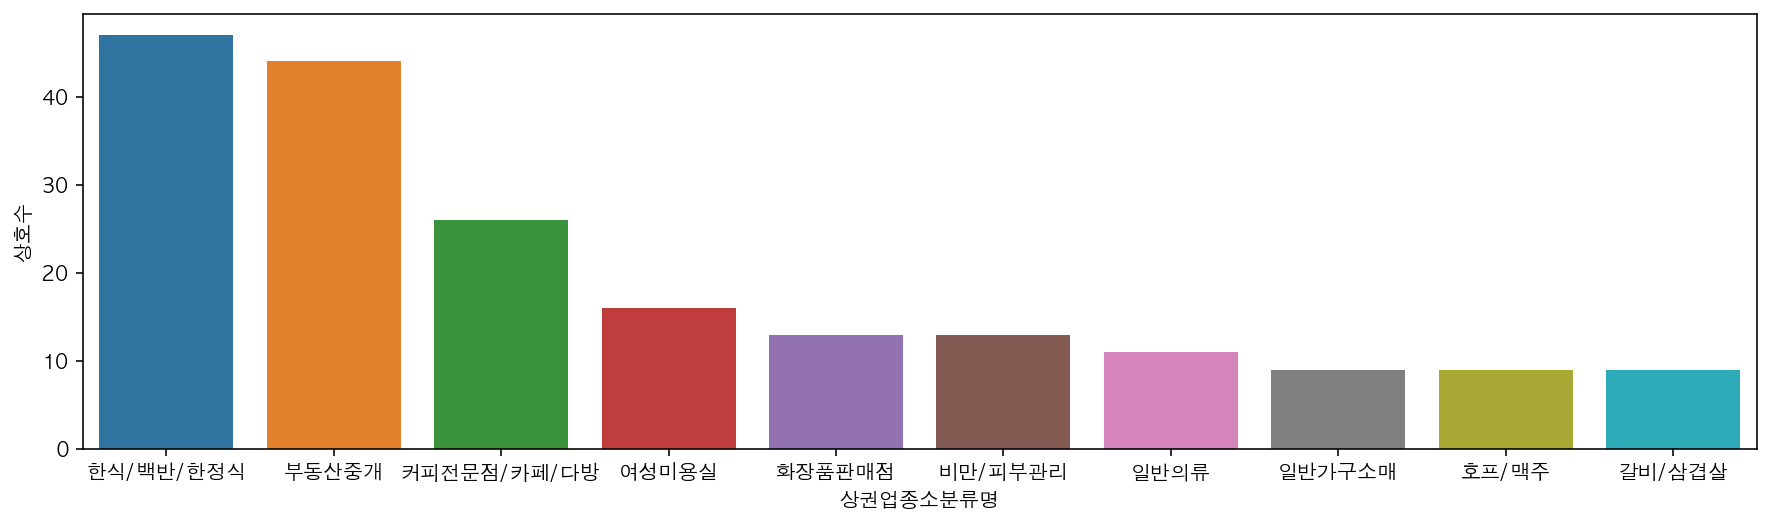

In [38]:
plt.figure(figsize=(15,4))
sns.barplot(data=tt,x="상권업종소분류명",y="상호수")

In [39]:
# 하위 10개 데이터 출력을 위해 상호수 기준으로 오름차순 정렬
bottom=g.sort_values(by="상호수",ascending = True)

In [40]:
# 시계열 그래프 출력을 위한 전처리 및 하위 10위에 해당 하는 데이터 추출
bt=bottom.reset_index()
btt= bt.head(10)

In [41]:
# 하위 10개 업종에 대한 결과 출력
btt

,상권업종중분류명,상권업종소분류명,상호수
0,유흥주점,꼬치구이전문점,1
1,캠프/별장/펜션,캠프/별장/펜션,1
2,커피점/카페,사주카페,1
3,커피점/카페,생과일주스전문점,1
4,패스트푸드,샌드위치전문점,1
5,의복의류,맞춤양복/양복점,1
6,사진/광학/정밀기기소매,안경원,1
7,사무/문구/컴퓨터,컴퓨터전문매장,1
8,실내운동시설,복싱도장,1
9,사무/문구/컴퓨터,사무용기기소매,1


<AxesSubplot:xlabel='상권업종소분류명', ylabel='상호수'>

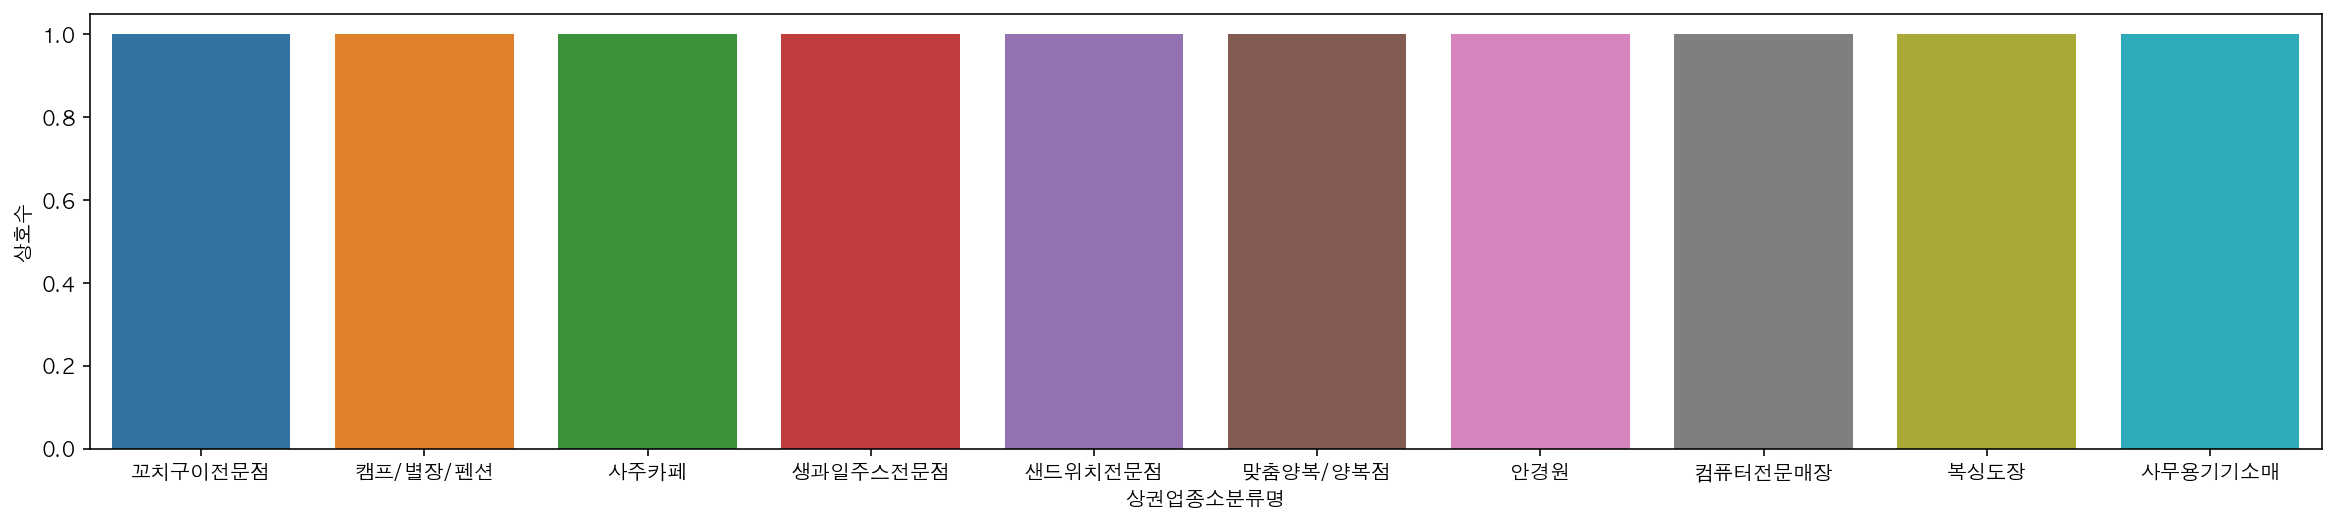

In [42]:
plt.figure(figsize=(20,4))
sns.barplot(data=btt,x="상권업종소분류명",y="상호수")

### 인사이트 도출

* 성남하나로클럽 기준 일정거리(500m) 안에 있는 업장들을 분석 및 분류한 결과는 다음과 같음  
  
  |상위 10개 업종분류|하위 10개 업종분류|
  |:---|:---|
  |* 한식-한식/백반/한정식</br> * 부동산중개-부동산중개</br> * 커피점/카페-커피전문점/카페/다방</br> * 이/미용/건강-여성미용실</br> * 화장품소매-화장품판매점</br> * 이/미용/건강-비만/피부관리</br> * 의복의류-일반의류</br> * 가구소매-일반가구소매</br> * 유흥주점-호프/맥주</br> * 한식-갈비/삼겹살|* 유흥주점-꼬치구이전문점 </br>* 캠프/별장/펜션-캠프/별장/펜션 커피점/카페-사주카페 </br>* 커피점/카페-생과일주스전문점 </br>* 패스트푸드-샌드위치전문점 </br>* 의복의류-맞춤양복/양복점 </br>* 사진/광학/정밀기기소매-안경원	 </br>* 사무/문구/컴퓨터-컴퓨터전문매장	 </br>* 실내운동시설-복싱도장	 </br>* 사무/문구/컴퓨터-사무용기기소매 </br>* 의복의류-여성의류전문점|</br></br>
</br></br>

* 따라서 한식, 부동산중개업, 카페, 미용실, 화장품판매점 등의 업종에 대해선 입점을 피하는게 좋고,  
  <u>안경원, 패스트푸드, 의약/의료품소매업 등 업종을 유치하는게 입지적 관점에서 좋은 선택이 될 수 있음.</u>

## OUTRO

* 기대 효과 
  - NH농협 관점
     + 객관적인 데이터를 근거로 합리적인 의사 결정 가능
  - 고객 관점
     + 고객 맞춤형 서비스 제공을 통해 쇼핑 만족도 증대 기대  



* 한계 및 보완점  
  - 하나로마트와 동명의 업장에 대해서는 필터링하기 어려움  
    해당 데이터를 통해 보다 정확한 인사이트를 얻고자한다면   
    상권업종분류의 균일화, 업체명의 규격화 등 농협하나로마트의 업체 정보에 대해 추가적인 관리 필요  
  - 고객의 연령, 성별, 기호도등 다양한 고객데이터와 함께한다면, 입점 업체 선정에 더 좋은 인사이트를 얻을 수 있음. 
   